In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# Charger les données

from google.colab import files
import pandas as pd

# Téléverser un fichier manuellement
uploaded = files.upload()

# Lire le fichier (nom à ajuster selon ce qui est téléversé)
df = pd.read_csv("train_data_fin.csv")

# Afficher les premières lignes
df.head()

Saving train_data_fin.csv to train_data_fin.csv


,surface,best_of,player1_avg_aces,player2_avg_aces,player1_avg_1stIn,player2_avg_1stIn,player1_avg_1stWon,player2_avg_1stWon,player1_avg_2ndWon,player2_avg_2ndWon,player1_ht,player2_ht,player1_age,player2_age,player1_rank,player2_rank,player1_rank_points,player2_rank_points,winner
0,Hard,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.266120,1.363380,-0.017365,-0.363095,-0.499466,-0.571945,0.616106,1.245004,0
1,Hard,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114518,-0.299669,-0.424936,-1.357595,-0.480780,-0.476408,0.377358,0.290815,1
2,Hard,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.266120,1.363380,-0.379650,-0.201199,-0.543065,-0.565121,1.240035,0.956826,1
3,Hard,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114518,-0.602042,-0.424936,-0.640630,-0.480780,1.038549,0.377358,-0.762635,1
4,Hard,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.266120,0.909821,-0.017365,-0.548118,-0.499466,-0.606066,0.616106,2.650670,0


In [7]:
df.columns

Index(['surface', 'best_of', 'player1_avg_aces', 'player2_avg_aces',
       'player1_avg_1stIn', 'player2_avg_1stIn', 'player1_avg_1stWon',
       'player2_avg_1stWon', 'player1_avg_2ndWon', 'player2_avg_2ndWon',
       'player1_ht', 'player2_ht', 'player1_age', 'player2_age',
       'player1_rank', 'player2_rank', 'player1_rank_points',
       'player2_rank_points', 'winner'],
      dtype='object')

In [13]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 best_of                  0
player1_avg_aces       415
player2_avg_aces       434
player1_avg_1stIn        0
player2_avg_1stIn        0
player1_avg_1stWon       0
player2_avg_1stWon       0
player1_avg_2ndWon       0
player2_avg_2ndWon       0
player1_ht              27
player2_ht              22
player1_age              0
player2_age              2
player1_rank            23
player2_rank            30
player1_rank_points     23
player2_rank_points     30
winner                   0
surface_Grass            0
surface_Hard             0
dtype: int64


In [14]:
df['player1_avg_1stIn'].unique()

array([0.])

In [15]:
df['player1_avg_1stWon'].unique()

array([0.])

In [16]:
df['player1_avg_2ndWon'].unique()

array([0.])

In [8]:
df = pd.get_dummies(df, columns=["surface"], drop_first=True)  # Pour éviter le piège des variables fictives

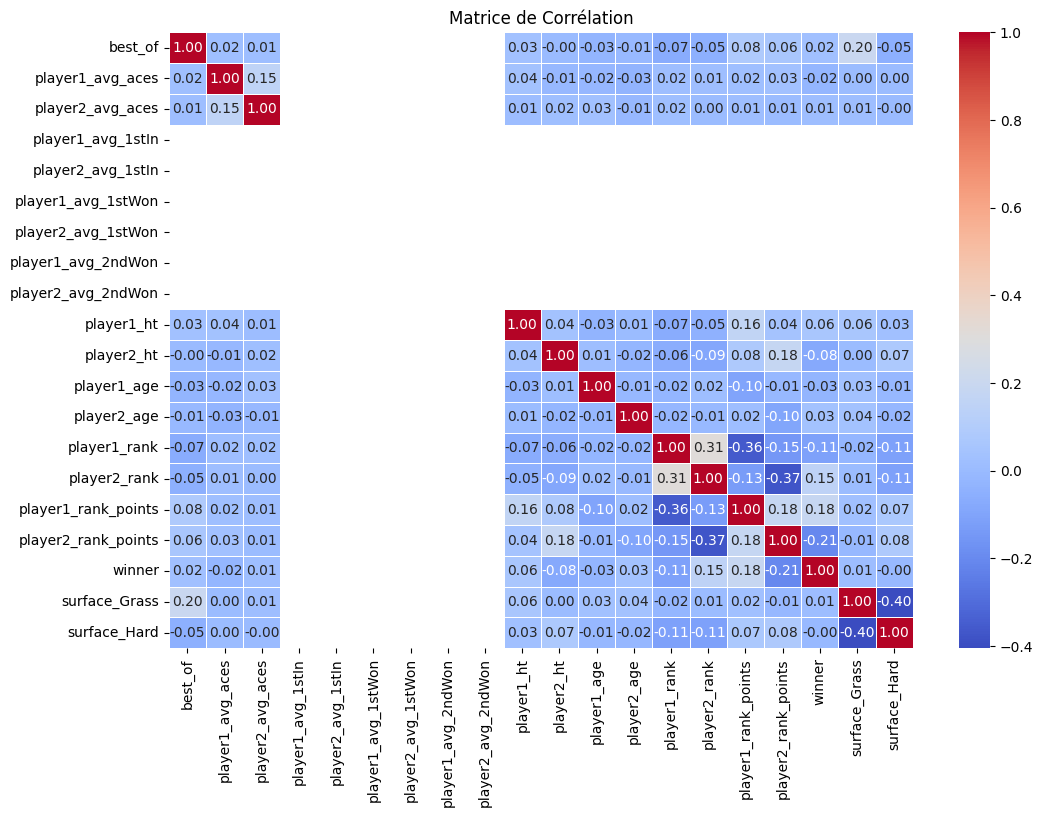

In [9]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


In [12]:
# Trier les corrélations avec `winner` en ordre décroissant
corr_with_player_1 = corr_matrix["player1_avg_aces"].abs().sort_values(ascending=False)
corr_with_player_2 = corr_matrix["player2_avg_aces"].abs().sort_values(ascending=False)
print(corr_with_player_1,corr_with_player_2)


player1_avg_aces       1.000000
player2_avg_aces       0.153308
player1_ht             0.035424
player2_age            0.034150
player2_rank_points    0.031534
player1_rank_points    0.022535
best_of                0.022517
winner                 0.022031
player1_age            0.016884
player1_rank           0.015875
player2_ht             0.013979
player2_rank           0.012574
surface_Grass          0.002866
surface_Hard           0.002191
player1_avg_1stIn           NaN
player2_avg_1stIn           NaN
player1_avg_1stWon          NaN
player2_avg_1stWon          NaN
player1_avg_2ndWon          NaN
player2_avg_2ndWon          NaN
Name: player1_avg_aces, dtype: float64 player2_avg_aces       1.000000
player1_avg_aces       0.153308
player1_age            0.030910
player2_ht             0.022382
player1_rank           0.020560
player1_rank_points    0.014104
player2_age            0.013691
winner                 0.012425
best_of                0.012285
surface_Grass          0.012116
p

In [66]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

df.fillna(df.median(), inplace=True)

# 🔹 Sélection des variables d'entrée (on exclut celles qui ont des NaN)
features = ["player2_avg_aces","player1_ht", "player2_age", "player2_rank_points",
            "player1_rank_points", "best_of", "player1_age", "player1_rank",
            "player2_ht", "player2_rank", "surface_Grass", "surface_Hard"]

X = df[features]
y = df["player1_avg_aces"]

# Normalisation des données (obligatoire pour Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Entraînement du modèle Lasso avec validation croisée
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# 🔹 Affichage des coefficients
lasso_coeffs = pd.Series(lasso.coef_, index=features)
print("Coefficients Lasso:")
print(lasso_coeffs)

# 🔹 Sélection des variables non nulles (les plus pertinentes)
selected_features = lasso_coeffs[lasso_coeffs != 0].index.tolist()
print("\nVariables sélectionnées:", selected_features)


Coefficients Lasso:
player2_avg_aces       0.297789
player1_ht             0.000000
player2_age           -0.000000
player2_rank_points    0.000000
player1_rank_points    0.000000
best_of                0.000000
player1_age           -0.000000
player1_rank           0.000000
player2_ht            -0.000000
player2_rank           0.000000
surface_Grass          0.000000
surface_Hard          -0.000000
dtype: float64

Variables sélectionnées: ['player2_avg_aces']


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Utiliser seulement les variables sélectionnées par Lasso
X_selected = df[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)  # Normalisation

# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

# 🔹 Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Prédictions et évaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📌 MSE: {mse:.4f}")
print(f"📌 R²: {r2:.4f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


📌 MSE: 15.6941
📌 R²: -0.0757
MAE: 3.023
RMSE: 3.962


In [71]:
# Création du DataFrame avec les nouvelles valeurs
new_match = pd.DataFrame({
    "player2_avg_aces": [0.74],
    "player1_ht": [188],
    "player2_age": [24],
    "player2_rank_points": [1425],
    "player1_rank_points": [813],
    "best_of": [3],
    "player1_age": [29],
    "player1_rank": [74],
    "player2_ht": [170],
    "player2_rank": [34],
    "surface_Grass": [0],
    "surface_Hard": [1]
})

# Ensure new_match only contains selected features before scaling
new_match_selected = new_match[selected_features]


# Normalisation des nouvelles données avec le scaler déjà ajusté sur les données d'entraînement
# Use the scaler fitted on the selected features
new_match_scaled = scaler.transform(new_match_selected)

# Prédiction du nombre d'aces pour Player 1
predicted_aces = rf_model.predict(new_match_scaled)

# Affichage de la prédiction
print(f"Nombre d'aces prédit pour Player 1 : {predicted_aces[0]:.2f}")

Nombre d'aces prédit pour Player 1 : 3.47


In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df.fillna(df.median(), inplace=True)

# 🔹 Sélection des variables d'entrée (on exclut celles qui ont des NaN)
features = ["player1_ht", "player2_age", "player2_rank_points",
            "player1_rank_points", "best_of", "player1_age", "player1_rank",
            "player2_ht", "player2_rank", "surface_Grass", "surface_Hard"]

# Définition de X (features) et y (cibles)
X = df[features]
y = df[["player1_avg_aces", "player2_avg_aces"]]  # Deux sorties

# Normalisation des données (important pour les NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construction du modèle MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cachée avec 64 neurones
    Dense(32, activation='relu'),  # Deuxième couche cachée
    Dense(2)  # Deux sorties (player1_avg_aces et player2_avg_aces)
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Évaluation du modèle
loss, mae = model.evaluate(X_test, y_test)
print(f"📊 Performance du modèle - MAE: {mae:.3f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 36.8296 - mae: 4.8363 - val_loss: 18.8714 - val_mae: 3.2272
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9346 - mae: 3.0750 - val_loss: 15.2288 - val_mae: 2.8889
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6762 - mae: 2.9379 - val_loss: 14.8898 - val_mae: 2.8377
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6822 - mae: 2.8775 - val_loss: 14.8019 - val_mae: 2.8246
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9525 - mae: 2.8696 - val_loss: 14.7456 - val_mae: 2.8145
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6792 - mae: 2.8547 - val_loss: 14.7633 - val_mae: 2.8201
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0126 - mae: 2.7701 - val_loss: 14.6789 - val_mae: 2.8058
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6631 - mae: 2.7719 - val_loss: 14.6222 - val_mae: 2.7912
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6161 -

PermutationExplainer explainer: 599it [01:37,  5.42it/s]


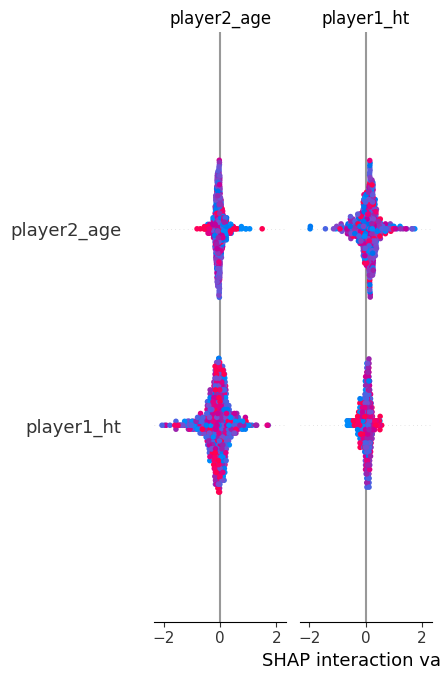

In [62]:
import shap

# Calcul de l'importance des variables avec SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Affichage de l'importance des variables
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédictions sur le test set
y_pred = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 MAE: {mae:.3f}")
print(f"📊 RMSE: {rmse:.3f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
📊 MAE: 2.876
📊 RMSE: 3.886


In [63]:
import numpy as np
import pandas as pd

def predict_aces(model, scaler, surface_Grass, surface_Hard, best_of, player1_ht, player2_ht, player1_age, player2_age,
                 player1_rank, player2_rank, player1_rank_points, player2_rank_points,
                 # Add missing features with default values
                 ):

    # Créer un DataFrame pour structurer l'entrée
    # Include all features used during training
    input_data = pd.DataFrame({
        "player1_ht": [player1_ht],
        "player2_age": [player2_age],
        "player2_rank_points": [player2_rank_points],
        "player1_rank_points": [player1_rank_points],
        "best_of": [best_of],
        "player1_age": [player1_age],
        "player1_rank": [player1_rank],
        "player2_ht": [player2_ht],
        "player2_rank": [player2_rank],
        "surface_Grass": [surface_Grass],
        "surface_Hard" : [surface_Hard],
    })

    # Appliquer la transformation du scaler pour normaliser les valeurs
    input_scaled = scaler.transform(input_data)
    print("🚀 Input avant transformation :", input_data)
    print("📊 Input après scaler :", input_scaled)


    # Faire la prédiction avec le modèle
    prediction = model.predict(input_scaled)

    # Extraire les résultats
    player1_pred_aces = prediction[0][0]
    player2_pred_aces = prediction[0][1]

    print(f"🎾 Prédiction :")
    print(f"➡️ Player 1 Aces: {player1_pred_aces:.2f}")
    print(f"➡️ Player 2 Aces: {player2_pred_aces:.2f}")

    return player1_pred_aces, player2_pred_aces


# 🎯 **EXEMPLE D'UTILISATION :**
# Provide values for the missing features in the example usage
player1_pred, player2_pred = predict_aces(
    model=model,
    scaler=scaler,
    surface_Grass=0, surface_Hard=1, best_of=3,
    player1_ht=188, player2_ht=170,
    player1_age=29, player2_age=24,
    player1_rank=74, player2_rank=34,
    player1_rank_points=813, player2_rank_points=1425,
)


🚀 Input avant transformation :    player1_ht  player2_age  player2_rank_points  player1_rank_points  best_of  \
0         188           24                 1425                  813        3   

   player1_age  player1_rank  player2_ht  player2_rank  surface_Grass  \
0           29            74         170            34              0   

   surface_Hard  
0             1  
📊 Input après scaler : [[ 1.88843538e+02  2.40080194e+01  1.43126422e+03  8.15749562e+02
  -4.60806545e-01  2.90000000e+01  7.42723096e+01  1.70575534e+02
   3.41648093e+01 -3.51284861e-01  8.67379627e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
🎾 Prédiction :
➡️ Player 1 Aces: 910.52
➡️ Player 2 Aces: 451.44
